In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from time import time
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [32]:
df=pd.read_csv('../data/rainfall_districts.csv')

FileNotFoundError: [Errno 2] File b'../data/rainfall_districts.csv' does not exist: b'../data/rainfall_districts.csv'

In [30]:
df.tail()

,year,day-number,date,sub humid,humid,very humid,semi arid,arid
20449,2012,362,2012-12-27,0.0,0.0,0.0,0.0,0.0
20450,2012,363,2012-12-28,0.0,0.0,0.0,0.0,0.0
20451,2012,364,2012-12-29,0.0,0.0,0.0,0.0,0.0
20452,2012,365,2012-12-30,0.0,0.0,0.0,0.0,0.0
20453,2012,366,2012-12-31,0.0,0.0,0.0,0.0,0.0


In [10]:
data = df.copy()
data['date']=data['date'].apply(pd.to_datetime)
from datetime import date
data_apr = data[data['date'] >= pd.Timestamp(date(2012,6,1 ))]

In [12]:
import plotly.express as px
fig = px.line(data_apr, x="date", y="sub humid")
fig.show()

(array([20200., 20250., 20300., 20350., 20400., 20450., 20500.]),
 <a list of 7 Text xticklabel objects>)

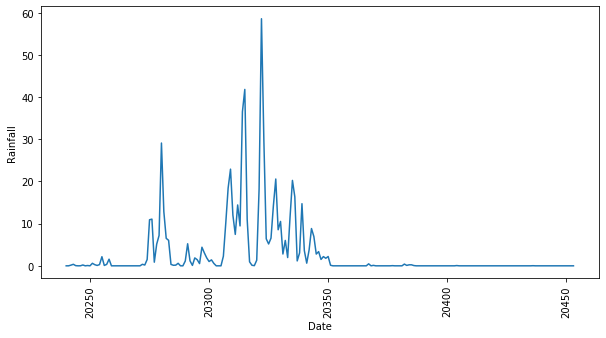

In [13]:
pyplot.figure(figsize=(10,5))
pyplot.plot(data_apr["sub humid"])
pyplot.xlabel("Date")
pyplot.ylabel("Rainfall")
pyplot.xticks(rotation=90)

In [18]:
plotconf = data_apr['sub humid']

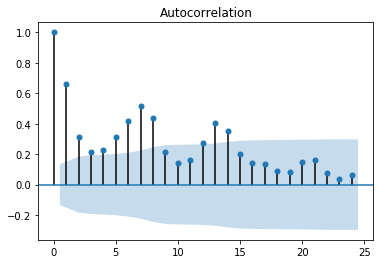

In [20]:
plot_acf(plotconf)
pyplot.show()

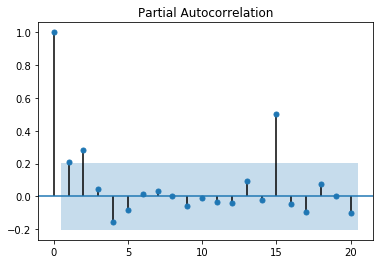

In [29]:
plot_pacf(plotconf)
pyplot.show()

In [21]:
semi=data_apr['sub humid'].to_list()

In [22]:
semi

[0.0,
 0.0,
 0.16,
 0.36,
 0.04,
 0.0,
 0.01,
 0.2,
 0.0,
 0.07,
 0.0,
 0.6,
 0.27,
 0.09,
 0.29,
 2.16,
 0.09,
 0.34,
 1.57,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.36,
 0.19,
 1.5,
 10.92,
 11.07,
 0.86,
 5.14,
 7.19,
 29.11,
 12.86,
 6.51,
 6.05,
 0.34,
 0.13,
 0.16,
 0.6,
 0.0,
 0.0,
 1.13,
 5.23,
 1.17,
 0.1,
 1.87,
 1.46,
 0.53,
 4.41,
 3.08,
 1.89,
 1.02,
 1.41,
 0.57,
 0.0,
 0.0,
 0.0,
 2.27,
 10.07,
 18.44,
 22.92,
 12.0,
 7.45,
 14.43,
 9.46,
 36.52,
 41.82,
 10.98,
 0.95,
 0.13,
 0.04,
 1.33,
 18.21,
 58.58,
 29.8,
 6.4,
 5.18,
 6.56,
 14.23,
 20.58,
 8.55,
 10.52,
 2.8,
 6.02,
 1.96,
 11.58,
 20.25,
 16.36,
 1.16,
 3.06,
 14.73,
 3.59,
 0.63,
 3.76,
 8.84,
 6.94,
 2.79,
 3.37,
 1.51,
 2.19,
 1.79,
 2.21,
 0.13,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.47,
 0.0,
 0.11,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 0.0,
 0.0,
 0.0,
 0.0,
 0.41,
 0.1,
 0.24,
 0.24,
 0.06,
 0.0,
 0

In [23]:
model_arima=ARIMA(semi ,(1,1,0))
model_arima_fit=model_arima.fit()
prediction_arima=model_arima_fit.forecast(7)[0]
prediction_arima

array([-2.74552133e-17, -5.52075385e-17, -8.29630789e-17, -1.10718654e-16,
       -1.38474230e-16, -1.66229805e-16, -1.93985381e-16])

(array([20200., 20250., 20300., 20350., 20400., 20450., 20500.]),
 <a list of 7 Text xticklabel objects>)

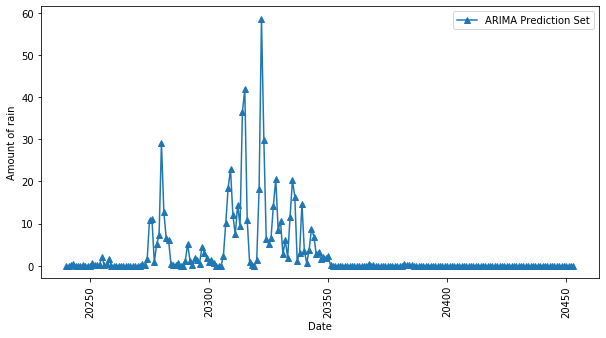

In [27]:
pyplot.figure(figsize=(10,5))
pyplot.plot(data_apr["sub humid"],label="ARIMA Prediction Set",marker="^")
#pyplot.plot(data_apr["sub humid"],label="Rain data till date",marker="o")
pyplot.legend()
pyplot.xlabel("Date")
pyplot.ylabel("Amount of rain")
pyplot.xticks(rotation=90)

(array([20200., 20250., 20300., 20350., 20400., 20450., 20500.]),
 <a list of 7 Text xticklabel objects>)

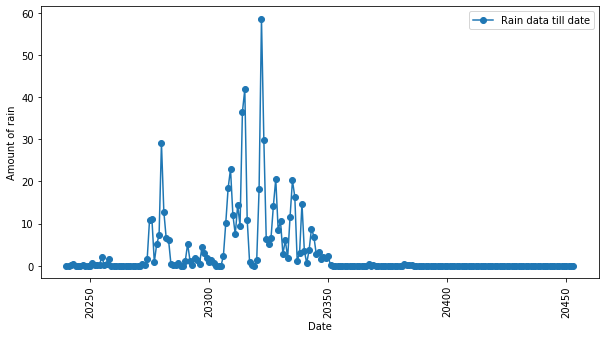

In [28]:
pyplot.figure(figsize=(10,5))
#pyplot.plot(data_apr["sub humid"],label="ARIMA Prediction Set",marker="^")
pyplot.plot(data_apr["sub humid"],label="Rain data till date",marker="o")
pyplot.legend()
pyplot.xlabel("Date")
pyplot.ylabel("Amount of rain")
pyplot.xticks(rotation=90)